In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import yfinance as yf

In [3]:
# 获取股票数据
stock_code = "600900.SS"
start_date = "2024-01-01"
end_date = "2024-06-01"
data = yf.download(stock_code, start=start_date, end=end_date)
data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-02,23.340000,23.770000,23.320000,23.680000,23.680000,68880298
2024-01-03,23.670000,23.799999,23.600000,23.760000,23.760000,60752512
2024-01-04,23.799999,23.980000,23.610001,23.799999,23.799999,61342335
2024-01-05,23.780001,23.950001,23.660000,23.740000,23.740000,70563121
2024-01-08,23.740000,23.820000,23.530001,23.600000,23.600000,65439403


In [4]:
cjdl = pd.DataFrame(index = data.index)
cjdl['price'] = data['Adj Close']
cjdl['diff'] = cjdl['price'].diff()
cjdl = cjdl.fillna(0.0)
cjdl['signal'] = np.where(cjdl['diff'] >= 0, 0, 1)
cjdl['order'] = cjdl['signal'].diff()*100
cjdl.head(10)

,price,diff,signal,order
Date,,,,
2024-01-02,23.680000,0.000000,0,NaN
2024-01-03,23.760000,0.080000,0,0.0
2024-01-04,23.799999,0.039999,0,0.0
2024-01-05,23.740000,-0.059999,1,100.0
2024-01-08,23.600000,-0.139999,1,0.0
2024-01-09,23.540001,-0.059999,1,0.0
2024-01-10,23.340000,-0.200001,1,0.0
2024-01-11,23.180000,-0.160000,1,0.0
2024-01-12,23.530001,0.350000,0,-100.0


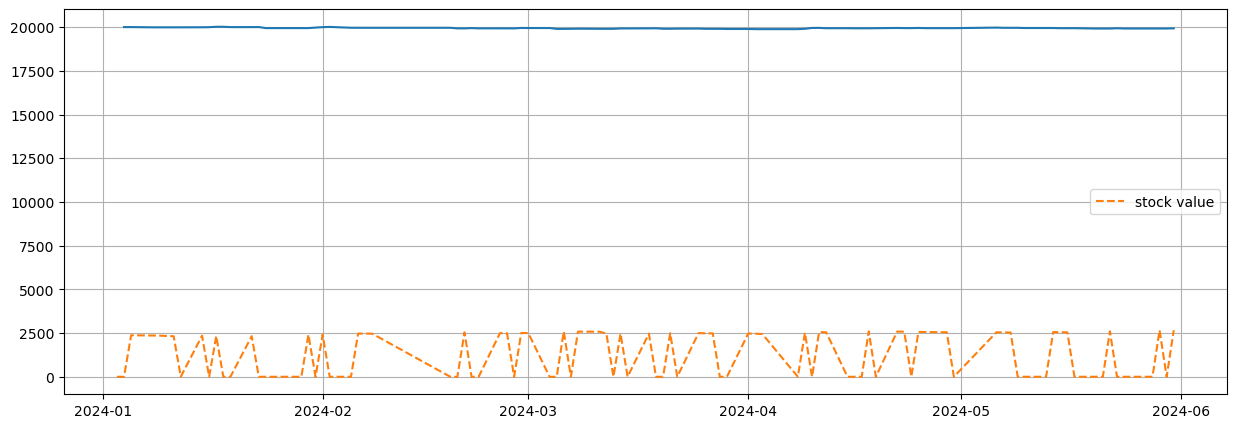

In [5]:
initial_cash = 20000.00
cjdl['stock'] = cjdl['order']*cjdl['price']
cjdl['cash'] = initial_cash - (cjdl['order'].diff()*cjdl['price']).cumsum()
cjdl['total'] = cjdl['stock'] + cjdl['cash']
plt.figure(figsize=(15,5))
plt.plot(cjdl['total'])
plt.plot(cjdl['order'].cumsum()*cjdl['price'], '--', label='stock value')
plt.grid()
plt.legend(loc='center right')
plt.show()

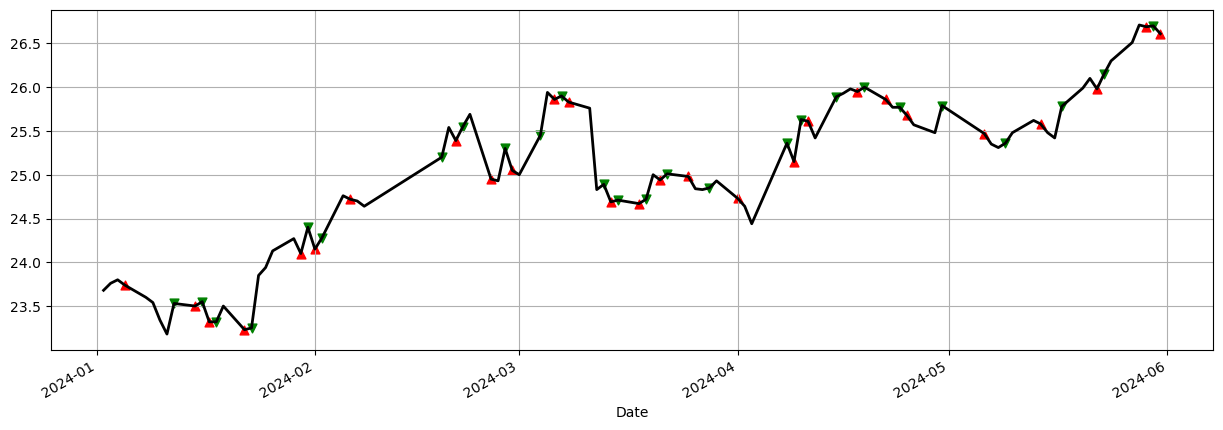

In [6]:
# 绘制买入卖出点和金额变化图
plt.figure(figsize=(15,5))
cjdl['price'].plot(linewidth=2, color='k', grid=True)
plt.scatter(cjdl['price'].loc[cjdl.order > 0].index, cjdl['price'][cjdl.order>0], marker = '^', s=40, c='r')
plt.scatter(cjdl['price'].loc[cjdl.order < 0].index, cjdl['price'][cjdl.order<0], marker = 'v', s=40, c='g')
plt.show()

In [7]:
period = 10
# 最近10天的价格，不足10天的按照实际天数取
avg_10 = []
avg_value = []
cjdl['Adj Close']  = data['Adj Close']
for price in cjdl['Adj Close']:
    avg_10.append(price)
    if len(avg_10) > period:
        del avg_10[0]
    avg_value.append(np.mean(avg_10))
# 为DF添加新的一列，avg_10
cjdl = cjdl.assign(avg_10 = pd.Series(avg_value, index=cjdl.index))
cjdl.head()

,price,diff,signal,order,stock,cash,total,Adj Close,avg_10
Date,,,,,,,,,
2024-01-02,23.680000,0.000000,0,NaN,NaN,NaN,NaN,23.680000,23.680000
2024-01-03,23.760000,0.080000,0,0.0,0.000000,NaN,NaN,23.760000,23.720000
2024-01-04,23.799999,0.039999,0,0.0,0.000000,20000.000000,20000.000000,23.799999,23.746667
2024-01-05,23.740000,-0.059999,1,100.0,2373.999977,17626.000023,20000.000000,23.740000,23.745000
2024-01-08,23.600000,-0.139999,1,0.0,0.000000,19986.000061,19986.000061,23.600000,23.716000


In [8]:
# 当价格超过10日均价即标记买入点，反之标记为卖出点
cjdl.head()

,price,diff,signal,order,stock,cash,total,Adj Close,avg_10
Date,,,,,,,,,
2024-01-02,23.680000,0.000000,0,NaN,NaN,NaN,NaN,23.680000,23.680000
2024-01-03,23.760000,0.080000,0,0.0,0.000000,NaN,NaN,23.760000,23.720000
2024-01-04,23.799999,0.039999,0,0.0,0.000000,20000.000000,20000.000000,23.799999,23.746667
2024-01-05,23.740000,-0.059999,1,100.0,2373.999977,17626.000023,20000.000000,23.740000,23.745000
2024-01-08,23.600000,-0.139999,1,0.0,0.000000,19986.000061,19986.000061,23.600000,23.716000


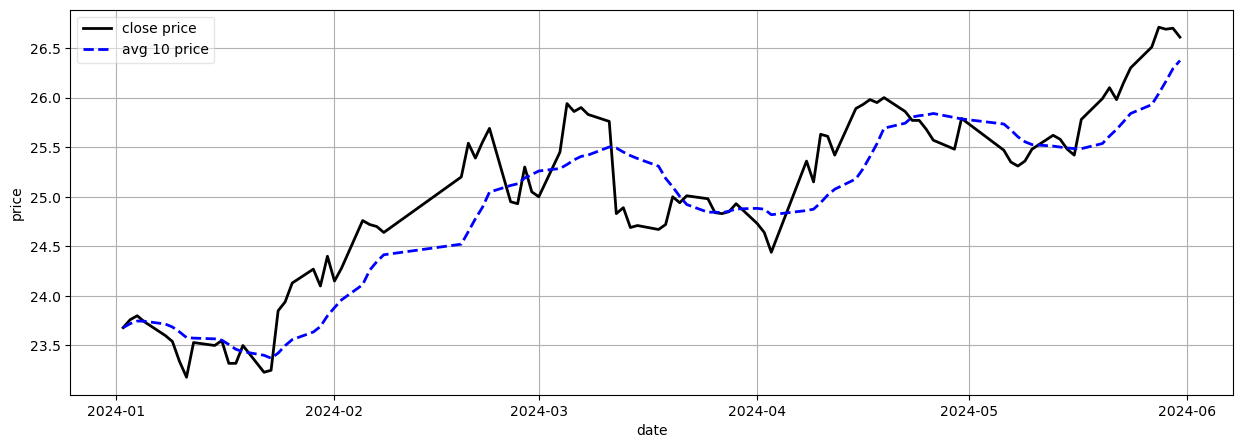

In [9]:
# 绘制价格走势线和10日均线
plt.figure(figsize=(15, 5))
plt.plot(cjdl['Adj Close'], lw=2, c='k', label='close price')
plt.plot(cjdl['avg_10'], '--', lw=2, c='b', label='avg 10 price')
plt.legend(framealpha=.5, fontsize='10')
plt.xlabel('date')
plt.ylabel('price')
plt.grid()
plt.show()

In [10]:
# 双移动平均交易策略
tactic = pd.DataFrame(index=cjdl.index)
tactic['signal'] = 0
tactic['avg_5'] = cjdl['Adj Close'].rolling(5).mean()
tactic['avg_10'] = cjdl['Adj Close'].rolling(10).mean()
tactic['signal'] = np.where(tactic['avg_5'] > tactic['avg_10'], 1, 0)
tactic['order'] = tactic['signal'].diff()
tactic.tail(10)

,signal,avg_5,avg_10,order
Date,,,,
2024-05-20,1,25.650,25.537,0.0
2024-05-21,1,25.754,25.612,0.0
2024-05-22,1,25.854,25.679,0.0
2024-05-23,1,26.000,25.758,0.0
2024-05-24,1,26.104,25.840,0.0
2024-05-27,1,26.208,25.929,0.0
2024-05-28,1,26.330,26.042,0.0
2024-05-29,1,26.472,26.163,0.0
2024-05-30,1,26.582,26.291,0.0


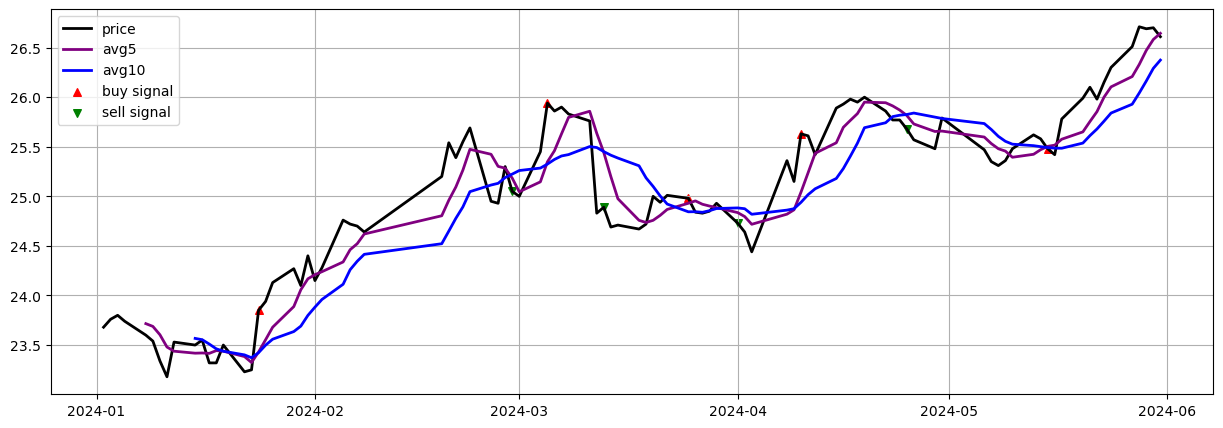

In [11]:
# 将双移动平均策略的买卖点画在图上
plt.figure(figsize=(15, 5))
plt.plot(cjdl['Adj Close'], linewidth=2, color='k', label='price')
plt.plot(tactic['avg_5'], lw=2, color='purple', label='avg5')
plt.plot(tactic['avg_10'], lw=2, color='blue', label='avg10')
plt.scatter(tactic.loc[tactic.order == 1].index,
            cjdl['Adj Close'][tactic.order == 1],
            marker='^', s=30, color='red', label='buy signal')
plt.scatter(tactic.loc[tactic.order == -1].index,
            cjdl['Adj Close'][tactic.order == -1],
            marker='v', s=30, color='green', label='sell signal')
plt.legend()
plt.grid()
plt.show()

In [18]:
# 双移动均线策略的回测
initial_cash = 20000.00
portfolio = pd.DataFrame(index=tactic.index).fillna(0)
portfolio["price"] = cjdl["Adj Close"]
portfolio["transaction_stock_volumn"] = tactic["order"] * 100
portfolio["transaction_amount"] = portfolio["transaction_stock_volumn"].multiply(
    portfolio["price"], axis=0
)
portfolio["cum_stock_volumn"] = portfolio["transaction_stock_volumn"].cumsum()
portfolio["cum_stock_value"] = portfolio["cum_stock_volumn"].multiply(portfolio["price"], axis=0)
portfolio["cash"] = initial_cash - portfolio["transaction_amount"].cumsum()
portfolio["total"] = portfolio["cash"] + portfolio["cum_stock_value"]
portfolio.to_csv(
    "/Users/ethan/code/projects/Python-Quant-Trade-In-Action/data/result/double_avg_portfolio.csv"
)
portfolio.tail(10)

,price,transaction_stock_volumn,transaction_amount,cum_stock_volumn,cum_stock_value,cash,total
Date,,,,,,,
2024-05-20,25.990000,0.0,0.0,100.0,2598.999977,17446.999931,20045.999908
2024-05-21,26.100000,0.0,0.0,100.0,2610.000038,17446.999931,20056.999969
2024-05-22,25.980000,0.0,0.0,100.0,2597.999954,17446.999931,20044.999886
2024-05-23,26.150000,0.0,0.0,100.0,2614.999962,17446.999931,20061.999893
2024-05-24,26.299999,0.0,0.0,100.0,2629.999924,17446.999931,20076.999855
2024-05-27,26.510000,0.0,0.0,100.0,2651.000023,17446.999931,20097.999954
2024-05-28,26.709999,0.0,0.0,100.0,2670.999908,17446.999931,20117.999840
2024-05-29,26.690001,0.0,0.0,100.0,2669.000053,17446.999931,20115.999985
2024-05-30,26.700001,0.0,0.0,100.0,2670.000076,17446.999931,20117.000008


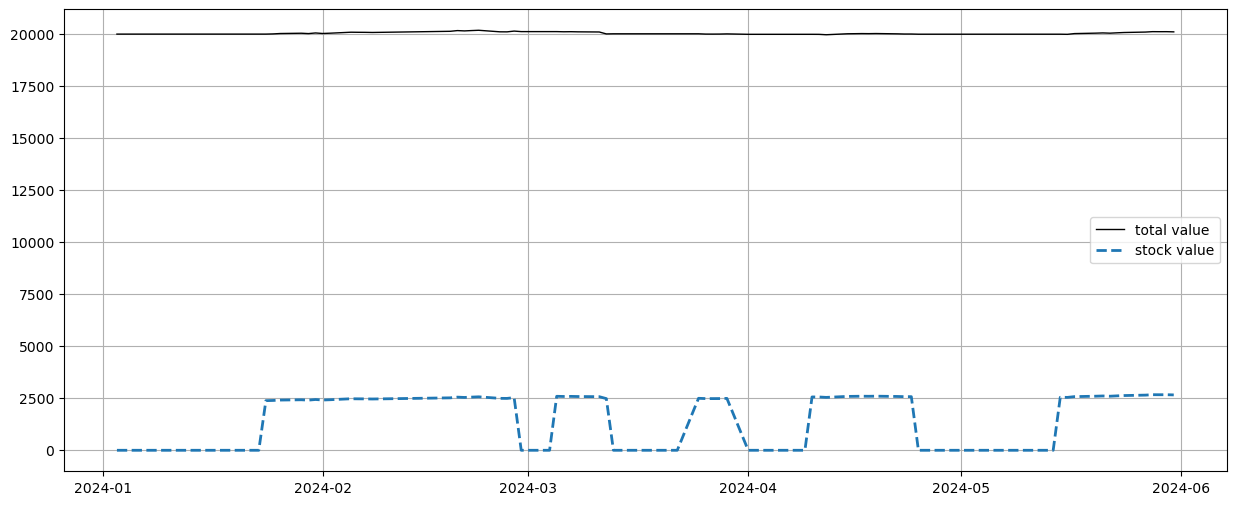

In [85]:
# 画出资产变化图
plt.figure(figsize=(15, 6))
plt.plot(portfolio["total"], lw=1, color="k", label="total value")
plt.plot(portfolio["cum_stock_value"], lw=2, ls="--", label="stock value")
plt.legend(loc='center right')
plt.grid()
plt.show()

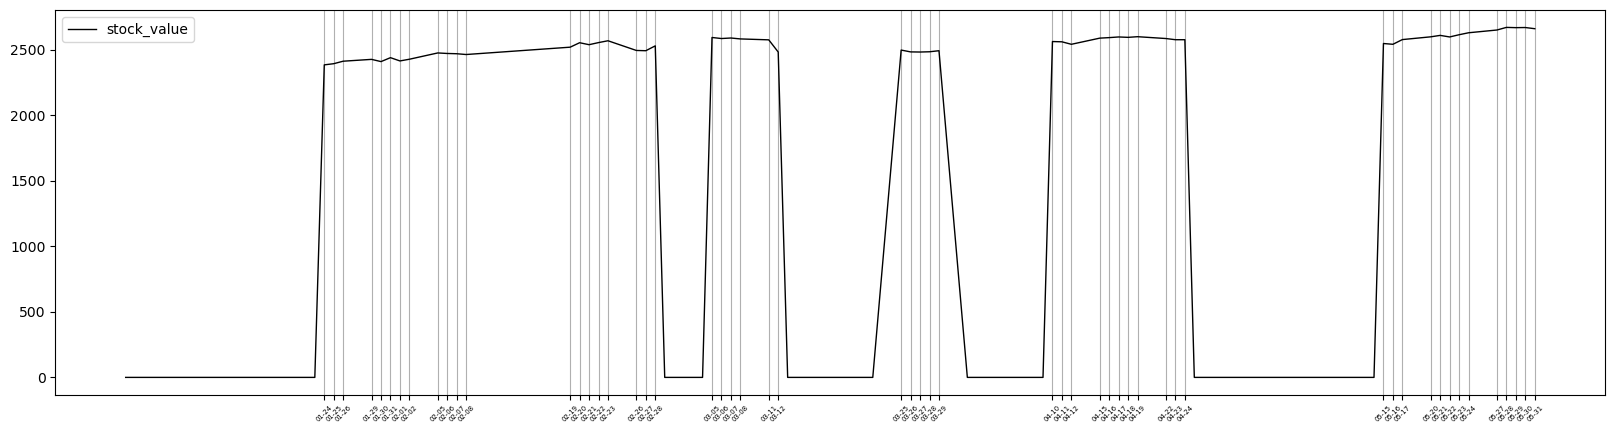

In [79]:
# 绘制市值变化的曲线
import matplotlib.dates as mdates
plt.figure(figsize=(20, 5))
plt.plot(portfolio["cum_stock_value"], lw=1, color="k", label="stock_value")
positive_dates = portfolio.index[portfolio["cum_stock_value"] > 0]
positive_values = portfolio["cum_stock_value"][portfolio["cum_stock_value"] > 0]
# for date, value in zip(positive_dates, positive_values):
    # plt.vlines(date, ymin=0, ymax=value, color='green', linestyle='dashed')
plt.xticks(positive_dates, rotation=45, fontsize=5)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
# plt.gca().tick_params(axis='x', which='major', length=0)
plt.gca().xaxis.grid(False)
plt.grid(axis='y')
plt.legend()
plt.grid()
plt.show()

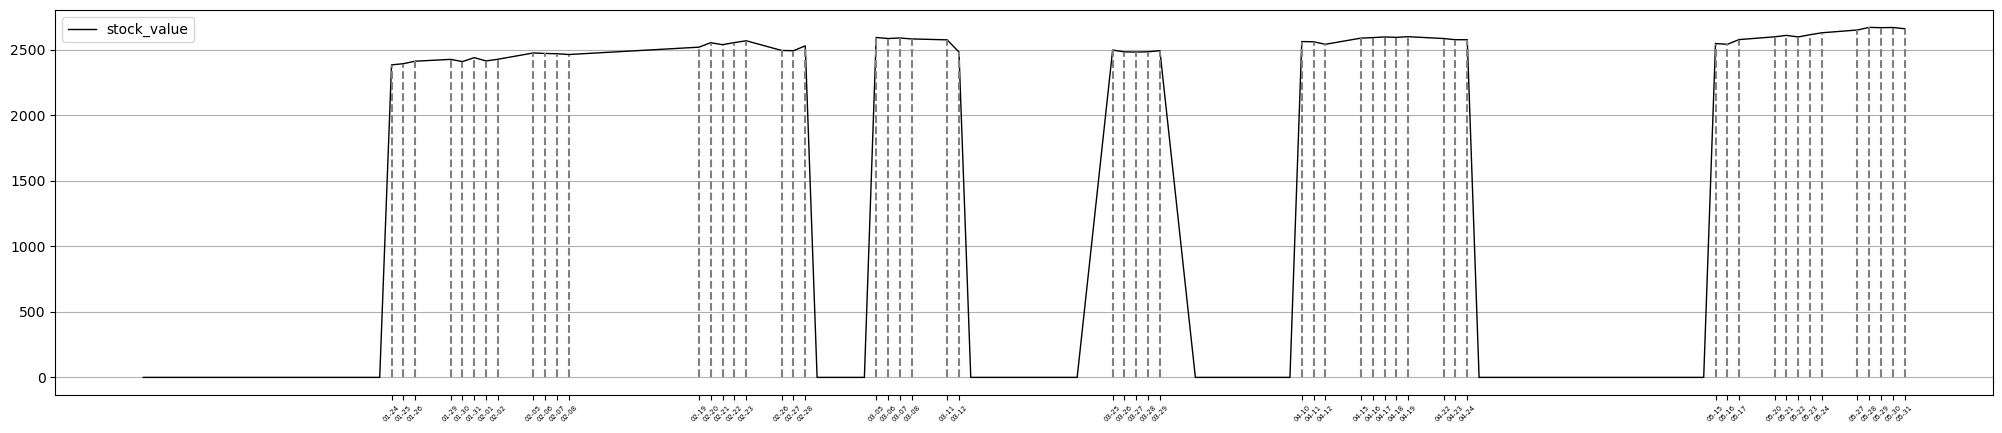

In [81]:
# 过滤出 cum_stock_value 大于 0 的日期和对应的值
positive_dates = portfolio.index[portfolio["cum_stock_value"] > 0]
positive_values = portfolio["cum_stock_value"][portfolio["cum_stock_value"] > 0]

# 创建图形
fig, ax = plt.subplots(figsize=(25, 5))

# 绘制市值变化的曲线
ax.plot(
    portfolio.index, portfolio["cum_stock_value"], lw=1, color="k", label="stock_value"
)

# 添加虚线
for date, value in zip(positive_dates, positive_values):
    ax.vlines(date, ymin=0, ymax=value, color="gray", linestyle="dashed")

# 设置 X 轴的刻度和刻度标签
ax.set_xticks(positive_dates)
ax.set_xticklabels(positive_dates.strftime("%m-%d"), rotation=45, fontsize=5)

# 取消 X 轴的网格线
ax.xaxis.grid(False)

# 添加图例
ax.legend()

# 添加网格，仅保留 Y 轴网格
ax.grid(axis="y")

# 显示图形
plt.show()

In [105]:
# 海龟策略
turtle = pd.DataFrame(index=cjdl.index)
turtle["high"] = cjdl["Adj Close"].shift(1).rolling(10).max()
turtle["low"] = cjdl["Adj Close"].shift(1).rolling(10).min()
turtle["buy"] = cjdl["Adj Close"] > turtle["high"]
turtle["sell"] = cjdl["Adj Close"] < turtle["low"]
turtle.tail()

,high,low,buy,sell
Date,,,,
2024-05-27,26.299999,25.420000,True,False
2024-05-28,26.510000,25.420000,True,False
2024-05-29,26.709999,25.420000,False,False
2024-05-30,26.709999,25.420000,False,False
2024-05-31,26.709999,25.780001,False,False


In [108]:
# 根据海龟策略的交易信号进行操作
turtle["orders"] = 0
position = 0
for k in range(len(turtle)):
    # if turtle['buy'].iloc[k] and position == 0:
    if turtle['buy'].iloc[k] :
        turtle.orders.values[k] = 1
        position = 1
    elif turtle['sell'].iloc[k] and position > 0:
        turtle.orders.values[k] = -1
        position = 0
turtle.tail(15)

,high,low,buy,sell,orders
Date,,,,,
2024-05-13,25.790001,25.309999,False,False,0
2024-05-14,25.790001,25.309999,False,False,0
2024-05-15,25.790001,25.309999,False,False,0
2024-05-16,25.790001,25.309999,False,False,0
2024-05-17,25.790001,25.309999,False,False,0
2024-05-20,25.780001,25.309999,True,False,1
2024-05-21,25.990000,25.309999,True,False,1
2024-05-22,26.100000,25.309999,False,False,0
2024-05-23,26.100000,25.360001,True,False,1


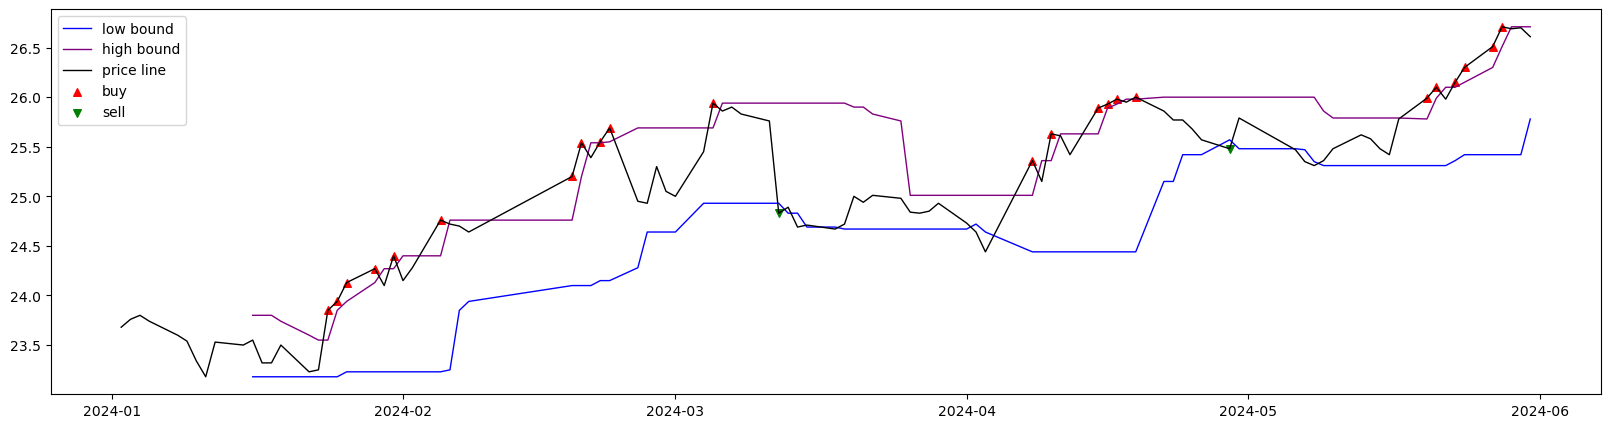

In [109]:
# 海龟交易策略的信号图
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(turtle.index, turtle["low"], lw=1, color="b", label="low bound")
ax.plot(turtle.index, turtle["high"], lw=1, color="purple", label="high bound")
ax.plot(turtle.index, cjdl["Adj Close"], lw=1, color="k", label="price line")
ax.scatter(
    turtle[turtle["orders"] == 1].index,
    cjdl["Adj Close"][turtle["orders"] == 1],
    marker="^",
    s=30,
    color="r",
    label="buy",
)
ax.scatter(
    turtle[turtle["orders"] == -1].index,
    cjdl["Adj Close"][turtle["orders"] == -1],
    marker="v",
    s=30,
    color="g",
    label="sell",
)
ax.legend()

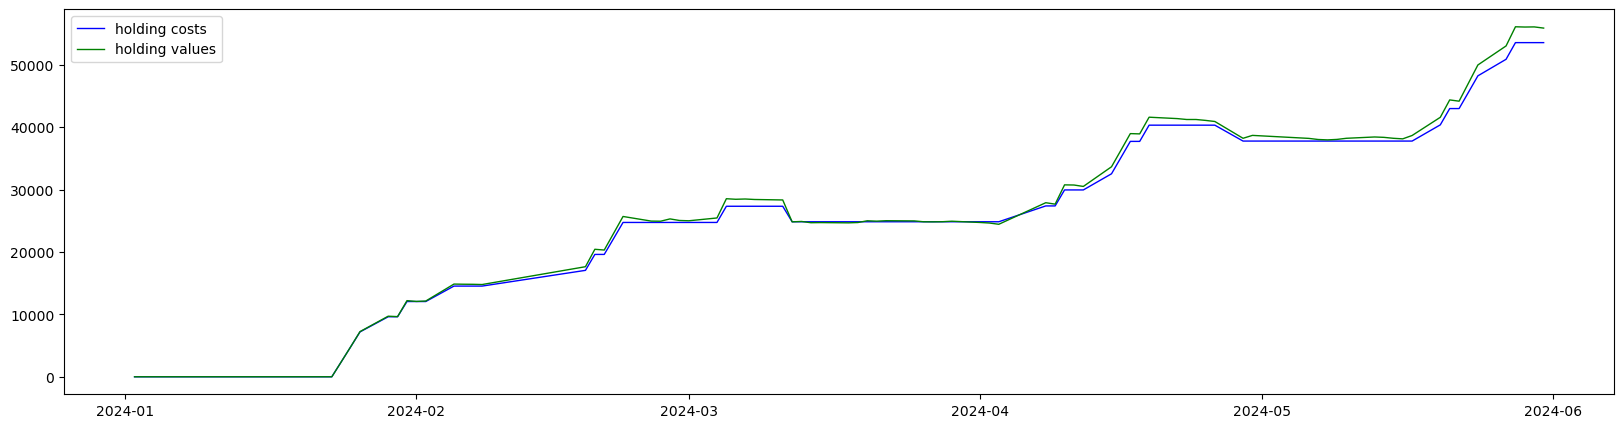

In [129]:
# 海龟策略的回测
positions = pd.DataFrame(index=turtle.index).fillna(0.0)
# 累计仓位
positions["stock"] = 100 * turtle["orders"].cumsum()
# 单笔交易成本
positions['cost'] = 100 * turtle['orders'].multiply(cjdl['Adj Close'])
# 策略的市值
turtle_portfolio = pd.DataFrame(index=turtle.index)
turtle_portfolio['holding_values'] = positions['stock'].multiply(cjdl["Adj Close"], axis=0)
turtle_portfolio['holding_costs'] = positions['cost'].cumsum()
# 年化收益率曲线
fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(turtle_portfolio.index, turtle_portfolio['holding_costs'], lw=1, color='b', label='holding costs')
ax.plot(turtle_portfolio.index, turtle_portfolio['holding_values'], lw=1, color='g', label='holding values')
ax.legend()


In [141]:
# 计算年化收益率曲线
# [values/costs - 1]/[ytd/all_trade_day_count]
# 总计交易天数
inteval = 242
turtle_portfolio.index.diff()
turtle_portfolio['flag'] = 1
turtle_portfolio['cum_day_count'] = turtle_portfolio['flag'].cumsum()
turtle_portfolio['annualized_return'] = (turtle_portfolio['holding_values']/turtle_portfolio['holding_costs'] - 1)/(turtle_portfolio['cum_day_count']/inteval)
turtle_portfolio.fillna(0.0)

,holding_values,holding_costs,flag,cum_day_count,annualized_return
Date,,,,,
2024-01-02,0.000000,0.000000,1,1,0.000000
2024-01-03,0.000000,0.000000,1,2,0.000000
2024-01-04,0.000000,0.000000,1,3,0.000000
2024-01-05,0.000000,0.000000,1,4,0.000000
2024-01-08,0.000000,0.000000,1,5,0.000000
...,...,...,...,...,...
2024-05-27,53020.000458,50880.000114,1,94,0.108281
2024-05-28,56090.998077,53551.000023,1,95,0.120825
2024-05-29,56049.001122,53551.000023,1,96,0.117590


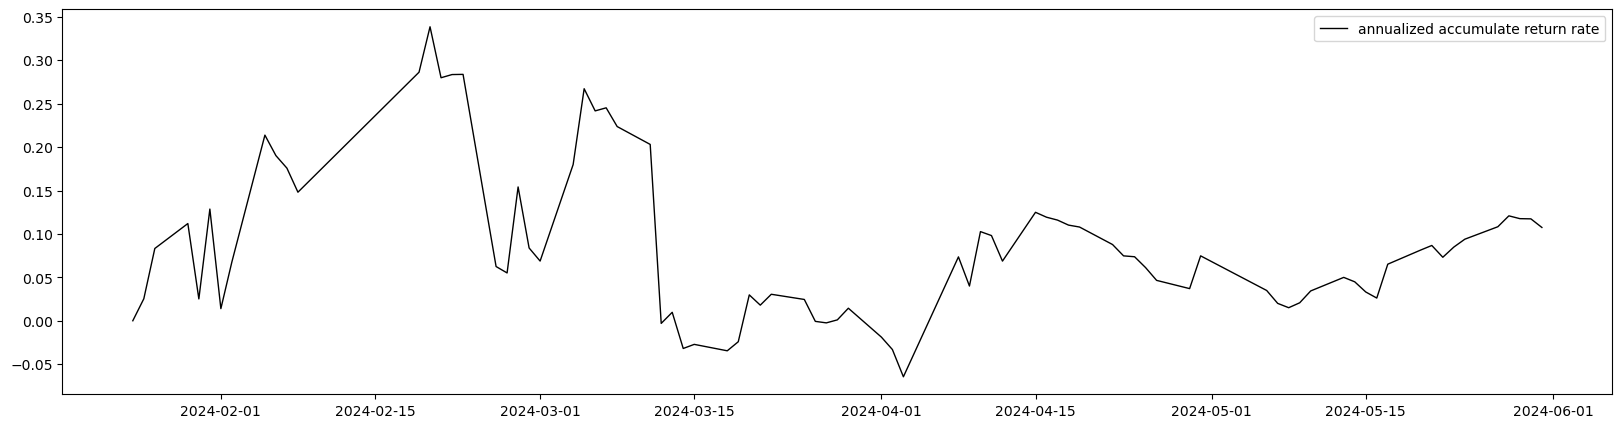

In [145]:
plt.figure(figsize=(20,5))
plt.plot(turtle_portfolio.index, turtle_portfolio['annualized_return'], lw=1, color='k', label='annualized accumulate return rate')
plt.legend()
plt.show()